In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# Loading data from the MYSQL server
conn = sqlite3.connect('sakila.db')

# creating a dataframe from the database
df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [3]:
# Viewing a dataframe
df.head(5)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [4]:
df.shape

(16044, 10)

In [5]:
# all the column names with their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [6]:
# Statistical measures of the dataset
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


## VISUALIZATION AND ANALYSIS

In [7]:
# analysing film rental rate column
df['film_rental_rate'].describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

In [8]:
df['film_rental_rate'].mean() # Average rate of film rented

2.9426302667662574

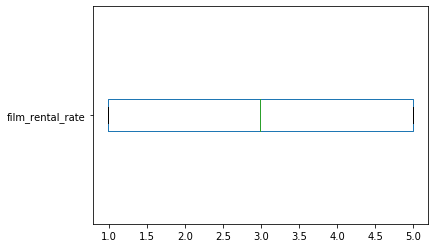

In [11]:
df['film_rental_rate'].plot(kind='box' , vert=False)
plt.show()
# no unusal buying rates as no outliers

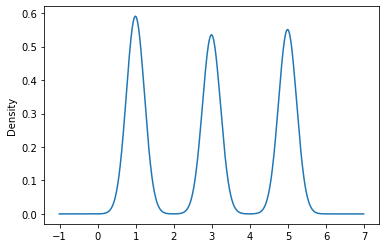

In [12]:
df['film_rental_rate'].plot(kind='kde')

In [13]:
# Visualizing categorical variables like cities , 2 types of cities
df['rental_store_city'].value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

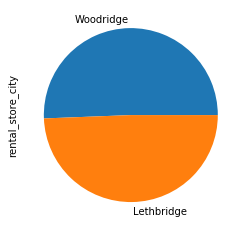

In [15]:
df['rental_store_city'].value_counts().plot(kind='pie')
plt.show()

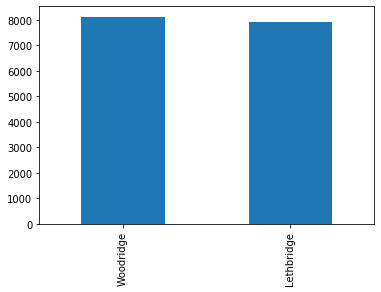

In [16]:
df['rental_store_city'].value_counts().plot(kind='bar')

## Columnn Wrangling

In [18]:
# adding a new rental rate return (earnings)
df['rental_rate_return'] = (df['film_rental_rate'] / df['film_replacement_cost'])*100
df['rental_rate_return'].head()

rental_id
1    13.597090
2    17.598587
3    19.946631
4     4.502046
5     9.969990
Name: rental_rate_return, dtype: float64

In [19]:
# mean of our rental earnings
df['rental_rate_return'].mean()

16.343824010240393

In [25]:
df['film_title'].value_counts().mean()

16.747390396659707

## SELECTION AND INDEXING

In [28]:
# Get rental record of customer with lastname Hansen
df.loc[df['customer_lastname']=='HANSEN']

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_rate_return
rental_id,,,,,,,,,,,
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990
134,2005-05-25 21:48:41,2005-06-02 18:28:41,HANSEN,2,Woodridge,JUMPING WRATH,4,0.99,18.99,NC-17,5.213270
416,2005-05-27 15:02:10,2005-05-29 10:34:10,HANSEN,2,Woodridge,LESSON CLEOPATRA,3,0.99,28.99,NC-17,3.414971
809,2005-05-29 19:10:20,2005-06-05 19:05:20,HANSEN,2,Woodridge,INDIAN LOVE,4,0.99,26.99,NC-17,3.668025
1006,2005-05-31 00:57:08,2005-06-02 22:35:08,HANSEN,2,Woodridge,SALUTE APOLLO,4,2.99,29.99,R,9.969990
1368,2005-06-15 14:27:47,2005-06-23 18:07:47,HANSEN,1,Lethbridge,HUNCHBACK IMPOSSIBLE,4,4.99,28.99,PG-13,17.212832
2603,2005-06-19 06:21:25,2005-06-26 03:19:25,HANSEN,2,Woodridge,CAT CONEHEADS,5,4.99,14.99,G,33.288859
5209,2005-07-09 11:22:39,2005-07-17 09:31:39,HANSEN,1,Lethbridge,WHALE BIKINI,4,4.99,11.99,PG-13,41.618015
5266,2005-07-09 14:17:40,2005-07-16 10:42:40,HANSEN,2,Woodridge,LOATHING LEGALLY,4,0.99,29.99,R,3.301100


In [34]:
#  create list of all films with the highest replacement cost
df.loc[df['film_replacement_cost'] == df['film_replacement_cost'].max()]

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_rate_return
rental_id,,,,,,,,,,,
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.96999
8,2005-05-24 23:31:46,2005-05-27 23:33:46,ROMERO,1,Lethbridge,LAWLESS VISION,6,4.99,29.99,G,16.63888
30,2005-05-25 04:01:32,2005-05-30 03:12:32,HOULE,1,Lethbridge,SONG HEDWIG,3,0.99,29.99,PG-13,3.30110
71,2005-05-25 10:26:39,2005-05-28 04:59:39,HAYES,2,Woodridge,LOATHING LEGALLY,4,0.99,29.99,R,3.30110
76,2005-05-25 11:30:37,2005-06-03 12:00:37,SMITH,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17,3.30110
...,...,...,...,...,...,...,...,...,...,...,...
15987,2005-08-23 20:22:17,2005-08-31 21:46:17,SILVERMAN,2,Woodridge,POSEIDON FOREVER,6,4.99,29.99,PG-13,16.63888
15991,2005-08-23 20:27:34,2005-08-28 16:48:34,RYAN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.96999
15992,2005-08-23 20:28:32,2005-08-24 21:35:32,HERRMANN,2,Woodridge,RIVER OUTLAW,4,0.99,29.99,PG-13,3.30110


In [35]:
# maximum rental replacement cost
df['film_replacement_cost'].max()

29.99

In [41]:
# How many PG and PG-13 rating films were rented
df.loc[  (df['film_rating'] == 'PG')  | (df['film_rating'] == 'PG-13') ]

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_rate_return
rental_id,,,,,,,,,,,
7,2005-05-24 23:11:53,2005-05-29 20:34:53,WALTERS,2,Woodridge,SWARM GOLD,4,0.99,12.99,PG-13,7.621247
9,2005-05-25 00:00:40,2005-05-28 00:22:40,SIMPSON,1,Lethbridge,MATRIX SNOWMAN,6,4.99,9.99,PG-13,49.949950
11,2005-05-25 00:09:02,2005-06-02 20:56:02,BURNS,1,Lethbridge,WHALE BIKINI,4,4.99,11.99,PG-13,41.618015
12,2005-05-25 00:19:27,2005-05-30 05:44:27,BYRD,1,Lethbridge,GAMES BOWFINGER,7,4.99,17.99,PG-13,27.737632
15,2005-05-25 00:39:22,2005-06-03 03:30:22,WEINER,1,Lethbridge,PELICAN COMFORTS,4,4.99,17.99,PG,27.737632
...,...,...,...,...,...,...,...,...,...,...,...
16038,2005-08-23 22:14:31,2005-08-30 03:28:31,WILLIS,1,Lethbridge,MICROCOSMOS PARADISE,6,2.99,22.99,PG-13,13.005655
16042,2005-08-23 22:20:40,2005-08-24 17:54:40,HICKS,2,Woodridge,CHARADE DUFFEL,3,2.99,21.99,PG,13.597090
16044,2005-08-23 22:24:39,2005-08-25 04:08:39,CARY,1,Lethbridge,EVERYONE CRAFT,4,0.99,29.99,PG,3.301100


In [43]:
print('Number of PG and PG-13 rented: ')
df.loc[  (df['film_rating'] == 'PG')  | (df['film_rating'] == 'PG-13') ].shape[0]

Number of PG and PG-13 rented: 


6797

In [44]:
# Film rental duration
# Film was rented for this period of time
df['film_rental_duration'].mean()

4.935489902767389

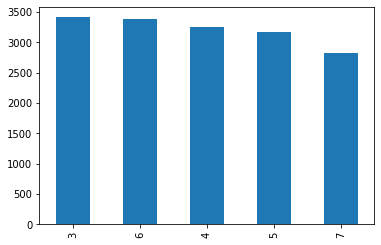

In [47]:
# Most common rental duration
df['film_rental_duration'].value_counts().plot(kind='bar')

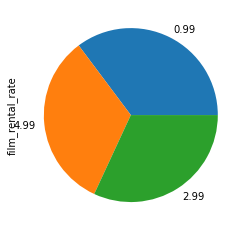

In [48]:
# Most common rental rate
df['film_rental_rate'].value_counts().plot(kind='pie')

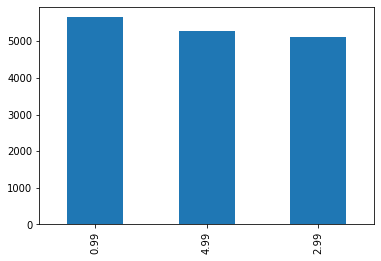

In [49]:
df['film_rental_rate'].value_counts().plot(kind='bar')

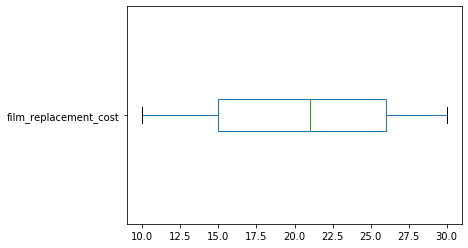

In [51]:
# Replacement cost distributed
df['film_replacement_cost'].plot(kind='box' , vert=False)

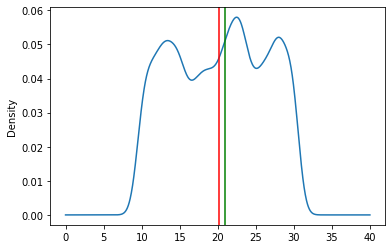

In [60]:
# density-plot
ax = df['film_replacement_cost'].plot(kind='kde')
# red mean line
ax.axvline(df['film_replacement_cost'].mean() , c='red')
# green median line
ax.axvline(df['film_replacement_cost'].median() , c='g')

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64


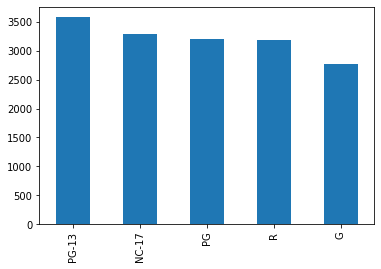

In [64]:
# Films of each rating we have
print(df['film_rating'].value_counts())

# bar plot
df['film_rating'].value_counts().plot(kind='bar')

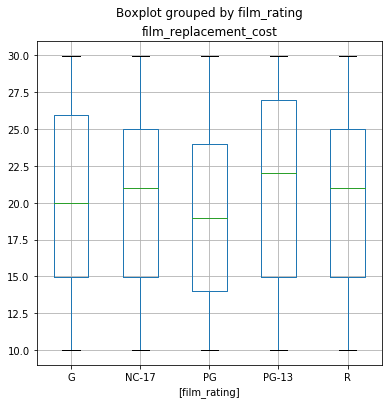

In [67]:
# relation between film replacement cost and film rating
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating' , figsize=(6,6))

In [77]:
# Adding new rental days column
df['rental_days'] = df[['return_date' , 'rental_date']].apply(lambda x: (x[0] - x[1]).days , axis=1)
df['rental_days']

rental_id
1        1.0
2        3.0
3        7.0
4        9.0
5        8.0
        ... 
16045    2.0
16046    3.0
16047    1.0
16048    7.0
16049    6.0
Name: rental_days, Length: 16044, dtype: float64

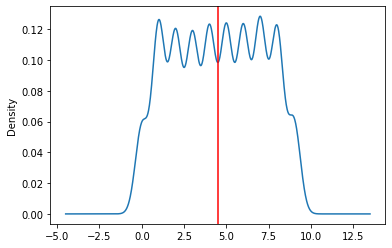

In [81]:
# finding distribution of rental days
ax = df['rental_days'].plot(kind='kde')
ax.axvline(df['rental_days'].mean() , c='r')

In [83]:
# adding a column, film daily rental rate
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']
df['film_daily_rental_rate'].head()

rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

In [99]:
# 10 films with lowest daily rental rate
df.sort_values('film_daily_rental_rate').head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_rate_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
14877,2005-08-22 03:39:56,2005-08-24 03:41:56,HERRERA,1,Lethbridge,DECEIVER BETRAYED,7,0.99,22.99,NC-17,4.306220,2.0,0.141429
5734,2005-07-10 11:37:28,2005-07-16 11:10:28,BOWENS,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,4.306220,5.0,0.141429
11899,2005-08-17 15:29:12,2005-08-24 17:41:12,PERRY,2,Woodridge,PRIMARY GLASS,7,0.99,16.99,G,5.826957,7.0,0.141429
4210,2005-07-07 11:36:20,2005-07-16 12:38:20,WOFFORD,2,Woodridge,HOOK CHARIOTS,7,0.99,23.99,G,4.126719,9.0,0.141429
7215,2005-07-27 09:24:00,2005-08-05 07:37:00,OLIVARES,2,Woodridge,MOON BUNCH,7,0.99,20.99,PG,4.716532,8.0,0.141429
1268,2005-06-15 07:29:30,2005-06-23 12:36:30,BURNS,1,Lethbridge,SIEGE MADRE,7,0.99,23.99,R,4.126719,8.0,0.141429
7229,2005-07-27 10:00:54,2005-07-28 13:58:54,LANE,2,Woodridge,DECEIVER BETRAYED,7,0.99,22.99,NC-17,4.306220,1.0,0.141429
7231,2005-07-27 10:01:51,2005-08-05 13:38:51,LONG,2,Woodridge,GILBERT PELICAN,7,0.99,13.99,G,7.076483,9.0,0.141429
7235,2005-07-27 10:09:30,2005-08-05 11:44:30,NGO,1,Lethbridge,EMPIRE MALKOVICH,7,0.99,26.99,G,3.668025,9.0,0.141429


In [100]:
# 10 films with highest daily rental rate
df.sort_values('film_daily_rental_rate' , ascending=False).head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_rate_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
14763,2005-08-21 23:34:00,2005-08-31 03:58:00,GIBSON,1,Lethbridge,FLINTSTONES HAPPINESS,3,4.99,11.99,PG-13,41.618015,9.0,1.663333
7055,2005-07-27 03:45:42,2005-07-30 05:11:42,GRANT,1,Lethbridge,VELVET TERMINATOR,3,4.99,14.99,R,33.288859,3.0,1.663333
7014,2005-07-27 02:14:40,2005-08-03 00:32:40,ELY,2,Woodridge,CLERKS ANGELS,3,4.99,15.99,G,31.207004,6.0,1.663333
1855,2005-06-17 00:54:58,2005-06-20 19:29:58,KRAUS,2,Woodridge,WIFE TURN,3,4.99,27.99,NC-17,17.827796,3.0,1.663333
11511,2005-08-16 23:39:59,2005-08-18 18:04:59,SCHRADER,2,Woodridge,INNOCENT USUAL,3,4.99,26.99,PG-13,18.488329,1.0,1.663333
1849,2005-06-17 00:13:19,2005-06-23 18:37:19,MENARD,1,Lethbridge,MAIDEN HOME,3,4.99,9.99,PG,49.949950,6.0,1.663333
1844,2005-06-16 23:53:53,2005-06-22 02:19:53,GRESHAM,2,Woodridge,KISSING DOLLS,3,4.99,9.99,R,49.949950,5.0,1.663333
11503,2005-08-16 23:10:34,2005-08-25 03:55:34,SEAL,2,Woodridge,FOOL MOCKINGBIRD,3,4.99,24.99,PG,19.967987,8.0,1.663333
1835,2005-06-16 23:05:36,2005-06-19 04:46:36,REYNOLDS,1,Lethbridge,FLINTSTONES HAPPINESS,3,4.99,11.99,PG-13,41.618015,2.0,1.663333


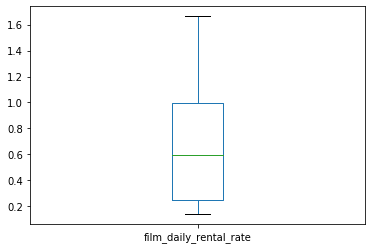

In [101]:
df['film_daily_rental_rate'].plot(kind='box')

In [103]:
# Rentals made in Lethbridge 
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

7923

In [112]:
# Rentals made in Lethbridge grouped by film-rating
df.loc[df['rental_store_city'] == 'Lethbridge' , 'film_rating'].value_counts()

PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: film_rating, dtype: int64

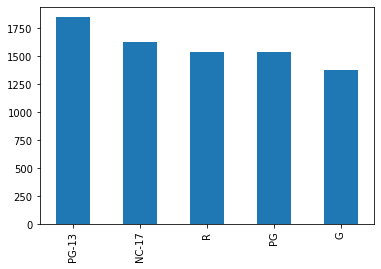

In [113]:
# bar plot for above values
df.loc[df['rental_store_city'] == 'Lethbridge' , 'film_rating'].value_counts().plot(kind='bar')

In [116]:
# rentals were made in Woodridge city with rental duration higher than 5 days
df.loc[ (df['rental_store_city'] == 'Woodridge') & (df['rental_days'] > 5) ].shape[0]

3125

In [118]:
# rentals made by store number 2 with repl cost < $10.99 
df.loc[ (df['store_id']==2) & (df['film_replacement_cost'] > 10.99)].shape[0]

7371